In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack
import scipy.signal

In [33]:
df_6_10 = pd.read_csv('pw14_U_sample_d')

In [34]:
df_6_10.head(5)
df_6_10.drop(['0'],axis=1,inplace=True)

In [35]:
n_probes = 18
n_time = 700

In [36]:
df_6_10.head(5)

Unnamed: 0        1         2   3        4         5   6        7  \
0           1  4.14477 -0.080041  0)  4.95024  0.882334  0)  4.22376   
1           2  4.13884 -0.077015  0)  4.95280  0.882662  0)  4.23115   
2           3  4.13290 -0.074032  0)  4.95504  0.882643  0)  4.23848   
3           4  4.12725 -0.071060  0)  4.95712  0.882027  0)  4.24583   
4           5  4.12205 -0.068169  0)  4.95915  0.880635  0)  4.25317   

          8   9 ...  48       49       50  51       52        53  54       55  \
0 -0.625495  0) ...  0)  5.14025  1.07278  0)  4.86580  0.863510  0)  5.06395   
1 -0.613126  0) ...  0)  5.15220  1.06030  0)  4.87591  0.857131  0)  5.07111   
2 -0.600326  0) ...  0)  5.16403  1.04788  0)  4.88589  0.850714  0)  5.07813   
3 -0.587080  0) ...  0)  5.17572  1.03543  0)  4.89573  0.844190  0)  5.08494   
4 -0.573485  0) ...  0)  5.18723  1.02292  0)  4.90542  0.837525  0)  5.09156   

         56  57  
0  0.792940  0)  
1  0.793340  0)  
2  0.793682  0)  
3  0.793923  0)  
4  0.794062  0)  

[5 rows x 58 columns]

In [37]:
c = np.linspace(1,57,78)
c = [int(i) for i in c]
c = [str(i) for i in c]
c.insert(0,'Time')


In [38]:
arr = np.linspace(1,(n_probes*3+1),(n_probes+1))
arr2 = np.linspace(2,(n_probes*3+2),(n_probes+1))
arr3 = np.linspace(3,(n_probes*3+3),(n_probes+1))

In [215]:
df_6_10_mean = df_6_10.mean()
df_6_10_mean

Unnamed: 0    386598.500000
1                  7.853230
2                  0.036545
3                  0.000000
4                  7.854776
5                  0.109745
6                  0.000000
7                  8.024805
8                 -0.082819
9                  0.000000
10                 8.725104
11                -0.047588
12                 0.000000
13                 9.121687
14                -0.022381
15                 0.000000
16                 9.594717
17                -0.004055
18                 0.000000
19                 9.605346
20                 0.064392
21                 0.000000
22                 3.000810
23                -0.150920
24                 0.000000
25                 3.061905
26                -0.176444
27                 0.000000
28                 9.969703
29                 0.028221
30                 0.000000
31                 7.666355
32                -0.022200
33                 0.000000
34                 2.968400
35                 0

In [39]:
df_6_10_mean = df_6_10.mean()
arr = [int(a) for a in arr]
arr2 = [int(a) for a in arr2]
arr3 = [int(a) for a in arr3]
arr = [str(a) for a in arr]
arr2 = [str(a) for a in arr2]
arr3 = [str(a) for a in arr3]
arr

['1',
 '4',
 '7',
 '10',
 '13',
 '16',
 '19',
 '22',
 '25',
 '28',
 '31',
 '34',
 '37',
 '40',
 '43',
 '46',
 '49',
 '52',
 '55']

In [40]:
df_6_10_u_fluc = np.zeros(((n_probes+1),(n_time+1)))
i = 0
j = 0
for a,i in zip(arr,range(0,(n_probes+1))):
    for k,j in zip(df_6_10[a],range(0,(n_time+1))):
        y = k - df_6_10_mean[a]
        df_6_10_u_fluc[i][j] = y

In [41]:
N = 700
# sample spacing
T = 1.0 / 100000
x = np.linspace(0.0, N*T, N)
y = df_6_10_u_fluc[0]
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

/home/adutta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


In [42]:
fs = 100000
f, Pxx_den = scipy.signal.periodogram(df_6_10_u_fluc[0], fs)

/home/adutta/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


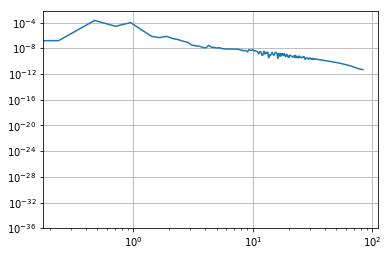

In [46]:
fsx = f*0.01/6
plt.loglog(fsx,Pxx_den)
plt.grid('on')

In [47]:
fsx

array([ 0.        ,  0.23775559,  0.47551117,  0.71326676,  0.95102235,
        1.18877794,  1.42653352,  1.66428911,  1.9020447 ,  2.13980029,
        2.37755587,  2.61531146,  2.85306705,  3.09082263,  3.32857822,
        3.56633381,  3.8040894 ,  4.04184498,  4.27960057,  4.51735616,
        4.75511175,  4.99286733,  5.23062292,  5.46837851,  5.70613409,
        5.94388968,  6.18164527,  6.41940086,  6.65715644,  6.89491203,
        7.13266762,  7.3704232 ,  7.60817879,  7.84593438,  8.08368997,
        8.32144555,  8.55920114,  8.79695673,  9.03471232,  9.2724679 ,
        9.51022349,  9.74797908,  9.98573466, 10.22349025, 10.46124584,
       10.69900143, 10.93675701, 11.1745126 , 11.41226819, 11.65002378,
       11.88777936, 12.12553495, 12.36329054, 12.60104612, 12.83880171,
       13.0765573 , 13.31431289, 13.55206847, 13.78982406, 14.02757965,
       14.26533524, 14.50309082, 14.74084641, 14.978602  , 15.21635758,
       15.45411317, 15.69186876, 15.92962435, 16.16737993, 16.40

In [48]:
df_6_10_v_fluc = np.zeros(((n_probes+1),(n_time+1)))
i = 0
j = 0
for a,i in zip(arr2,range(0,(n_probes+1))):
    for k,j in zip(df_6_10[a],range(0,(n_time+1))):
        y = k - df_6_10_mean[a]
        df_6_10_v_fluc[i][j] = y

/home/adutta/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


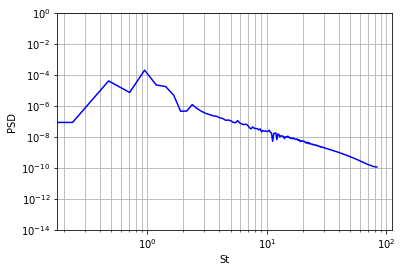

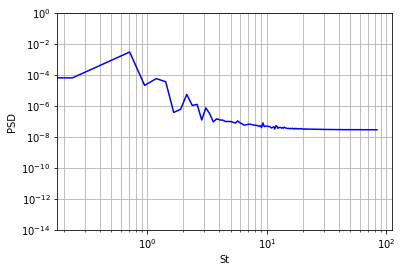

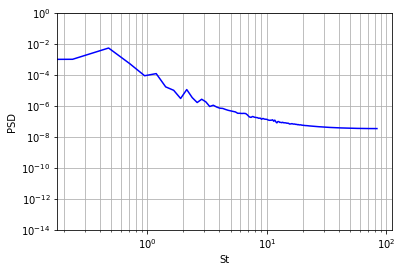

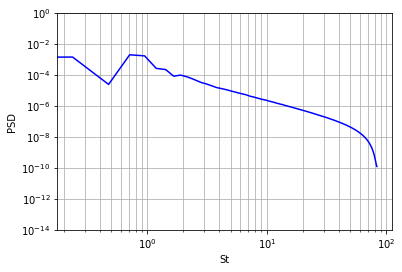

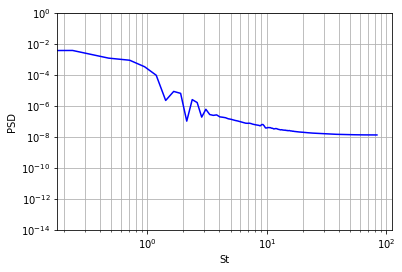

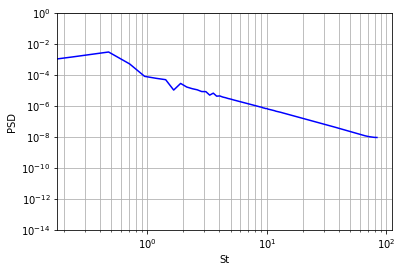

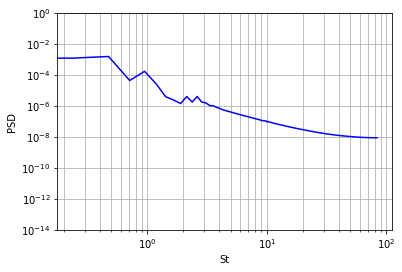

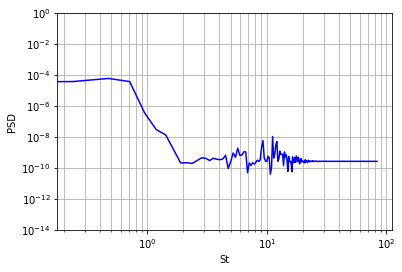

In [53]:
for i in range(0,8):
    plt.figure()
    f, Pxx_v_den = scipy.signal.periodogram(df_6_10_v_fluc[i], fs)
    fsx = f*0.01/6
    k = str(i+1)
    plt.loglog(fsx,Pxx_v_den,'b')
    plt.ylim(1e-14,1)
    plt.minorticks_on
    plt.grid('on',which='both')
    plt.xlabel('St')
    plt.ylabel('PSD')
    #plt.text(10,0.1,"Probe = "+k)
    plt.savefig(k)